In [34]:
import umap
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/Users/alicedriessen/.virtualenvs/carot/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_path = "/Users/alicedriessen/Box/CAR_Tcells/Data/D09D17/"
fig_save_path = "/Users/alicedriessen/Box/CAR_Tcells/Figures/"

In [6]:
adata = sc.read_h5ad(f"{data_path}20240229_from_rocio_for_manuscript.h5ad")


In [7]:
counts = adata.obs.groupby(["subset", "CAR_Variant"]).count()["orig.ident"].reset_index().rename(columns={"orig.ident":"count"})

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_55145/2445388735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = adata.obs.groupby(["subset", "CAR_Variant"]).count()["orig.ident"].reset_index().rename(columns={"orig.ident":"count"})


In [8]:
counts

,subset,CAR_Variant,count
0,CD4,41BB-41BB-z,933
1,CD4,41BB-CD28-z,1357
2,CD4,41BB-CD40-z,971
3,CD4,41BB-CTLA4-z,311
4,CD4,41BB-IL15RA-z,1051
5,CD4,41BB-NA-z,957
6,CD4,CD28-41BB-z,215
7,CD4,CD28-CD28-z,1042
8,CD4,CD28-CD40-z,1023
9,CD4,CD28-CTLA4-z,268


# CD4

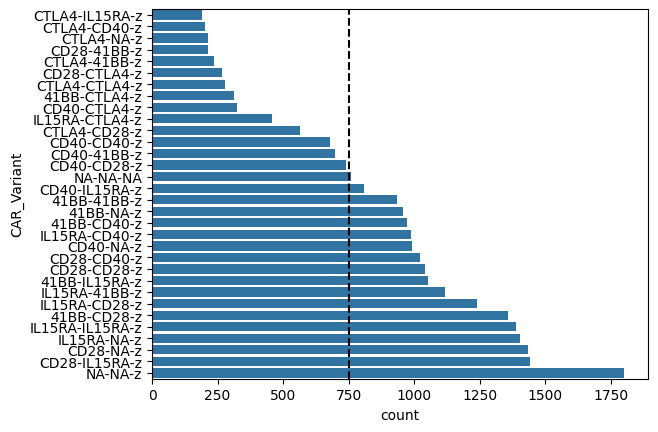

In [12]:
g = sns.barplot(data=counts[counts["subset"]=="CD4"], x="count", y="CAR_Variant", order=counts[counts["subset"]=="CD4"].sort_values("count")["CAR_Variant"])
g.axvline(x=750, color="black", linestyle="--")
plt.savefig(f"{fig_save_path}CD4_CAR_selection.pdf", bbox_inches="tight")
plt.show()

In [6]:
sel_CD4=list(counts.loc[(counts["subset"]=="CD4")&(counts["count"]>750), "CAR_Variant"])
sel_CD4.remove("NA-NA-z")
sel_CD4.remove("NA-NA-NA")

In [7]:
sel_CD4

['41BB-41BB-z',
 '41BB-CD28-z',
 '41BB-CD40-z',
 '41BB-IL15RA-z',
 '41BB-NA-z',
 'CD28-CD28-z',
 'CD28-CD40-z',
 'CD28-IL15RA-z',
 'CD28-NA-z',
 'CD40-IL15RA-z',
 'CD40-NA-z',
 'IL15RA-41BB-z',
 'IL15RA-CD28-z',
 'IL15RA-CD40-z',
 'IL15RA-IL15RA-z',
 'IL15RA-NA-z']

# CD8

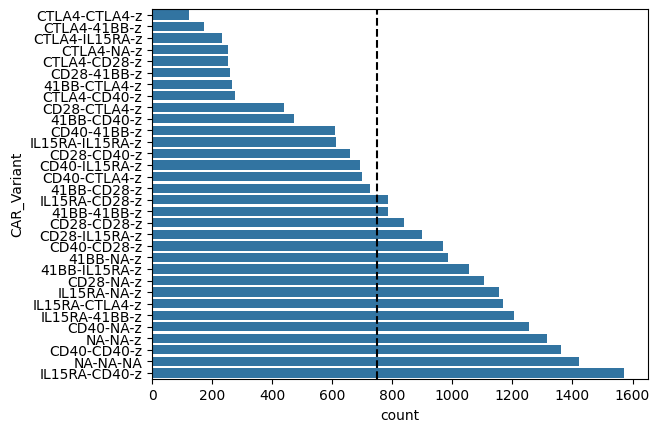

In [13]:
g = sns.barplot(data=counts[counts["subset"]=="CD8"], x="count", y="CAR_Variant", order=counts[counts["subset"]=="CD8"].sort_values("count")["CAR_Variant"])
g.axvline(x=750, color="black", linestyle="--")
plt.savefig(f"{fig_save_path}CD8_CAR_selection.pdf", bbox_inches="tight")
plt.show()

In [9]:
sel_CD8=list(counts.loc[(counts["subset"]=="CD8")&(counts["count"]>750), "CAR_Variant"])
sel_CD8.remove("NA-NA-z")
sel_CD8.remove("NA-NA-NA")

In [10]:
sel_CD8

['41BB-41BB-z',
 '41BB-IL15RA-z',
 '41BB-NA-z',
 'CD28-CD28-z',
 'CD28-IL15RA-z',
 'CD28-NA-z',
 'CD40-CD28-z',
 'CD40-CD40-z',
 'CD40-NA-z',
 'IL15RA-41BB-z',
 'IL15RA-CD28-z',
 'IL15RA-CD40-z',
 'IL15RA-CTLA4-z',
 'IL15RA-NA-z']

# Domains

In [19]:
cd4 = sc.read_h5ad("/Users/alicedriessen/Box/CAR_Tcells/Model/OT/CD4.h5ad")
cd8 = sc.read_h5ad("/Users/alicedriessen/Box/CAR_Tcells/Model/OT/CD8.h5ad")

In [20]:
for domain in ["41BB", "CD28", "CD40", "CTLA4", "IL15RA"]:
    cd4.obs[domain] = [True if domain in car else False for car in cd4.obs["CAR_Variant"] ]
    cd8.obs[domain] = [True if domain in car else False for car in cd8.obs["CAR_Variant"] ]

In [24]:
cd4.obs[["41BB", "CD28", "CD40", "CTLA4", "IL15RA"]].sum().sort_values()

CTLA4      3045
CD40       7421
41BB       7845
CD28       9321
IL15RA    10083
dtype: int64

In [25]:
cd8.obs[["41BB", "CD28", "CD40", "CTLA4", "IL15RA"]].sum().sort_values()

CTLA4     3881
41BB      6537
CD28      6930
CD40      8563
IL15RA    9383
dtype: int64

In [32]:
embedding = pd.read_csv("/Users/alicedriessen/Box/CAR_Tcells/Model/OT/embedding/esm2_t48_15B_UR50D_tail_dim_transposed", index_col=0)

In [33]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,5110,5111,5112,5113,5114,5115,5116,5117,5118,5119
41BB-41BB-z,0.155978,0.045222,0.026352,0.014275,0.023382,-0.075279,0.030466,-0.003676,-0.146142,-0.059330,...,-0.073249,0.131060,0.132889,0.007351,-0.017049,0.016074,-0.114739,-0.055525,-0.124951,0.024763
41BB-CD28-z,0.098422,0.099390,0.007207,0.016832,-0.002124,-0.005198,-0.037497,-0.054467,-0.151756,-0.018978,...,-0.100037,0.080645,0.136172,-0.019142,-0.016410,-0.075514,-0.090173,-0.049362,-0.198416,0.111613
41BB-CD40-z,0.053800,0.064902,0.006235,0.038799,-0.012659,0.031548,-0.036813,-0.031211,-0.163230,-0.068982,...,-0.159227,0.096020,0.154670,0.009562,0.004588,-0.036408,-0.094245,-0.063904,-0.203860,0.085274
41BB-CTLA4-z,0.088310,0.066811,0.017463,0.000225,-0.001227,0.019808,-0.063538,-0.056404,-0.154855,-0.045705,...,-0.125018,0.102738,0.125037,-0.012838,-0.004313,-0.053014,-0.088548,-0.077711,-0.185529,0.081749
41BB-IL15RA-z,0.085204,0.060878,0.042018,0.010733,-0.021006,0.031031,-0.027010,-0.053791,-0.136782,-0.057518,...,-0.131508,0.120622,0.152385,-0.005614,-0.012125,-0.042841,-0.081252,-0.065487,-0.148847,0.092186
41BB-NA-z,0.114517,0.052524,0.010058,-0.050969,0.016786,-0.014477,0.021905,-0.048880,-0.106246,-0.058580,...,-0.082960,0.146563,0.111723,-0.015352,-0.026982,-0.056178,-0.055392,-0.045073,-0.129877,0.106002
CD28-41BB-z,0.095243,0.072486,0.012539,0.020064,-0.003564,-0.004601,-0.031035,-0.043306,-0.175567,-0.030651,...,-0.105816,0.081052,0.130774,-0.029942,-0.018653,-0.090419,-0.082577,-0.063961,-0.182529,0.093569
CD28-CD28-z,0.161601,0.090545,-0.013434,0.046789,0.047273,-0.087680,0.039831,-0.017841,-0.209997,-0.060115,...,-0.066947,0.053981,0.111546,-0.011093,-0.001158,-0.019902,-0.131827,-0.017304,-0.160892,0.036214
CD28-CD40-z,0.085074,0.081712,-0.015085,0.062467,0.001786,0.000764,-0.037307,-0.036615,-0.185612,-0.047817,...,-0.128169,0.058601,0.139189,-0.022397,0.015756,-0.114087,-0.078431,-0.036435,-0.219263,0.062611
CD28-CTLA4-z,0.092406,0.089453,-0.003660,0.031688,0.017348,-0.019480,-0.026349,-0.064761,-0.180994,-0.031554,...,-0.102672,0.060495,0.092421,-0.033335,0.012400,-0.104316,-0.075675,-0.045092,-0.209541,0.072640


In [35]:
umapper = umap.UMAP(random_state=1234)
Y1 = umapper.fit_transform(embedding)

/Users/alicedriessen/.virtualenvs/carot/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alicedriessen/.virtualenvs/carot/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


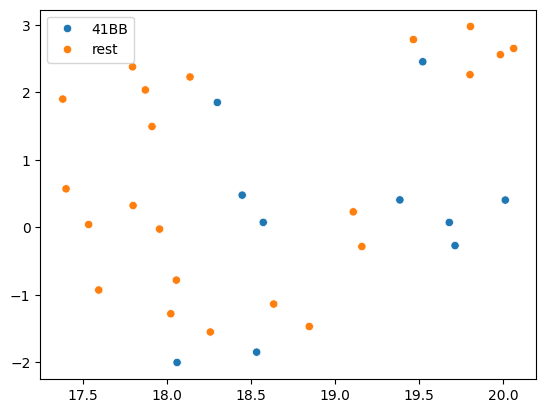

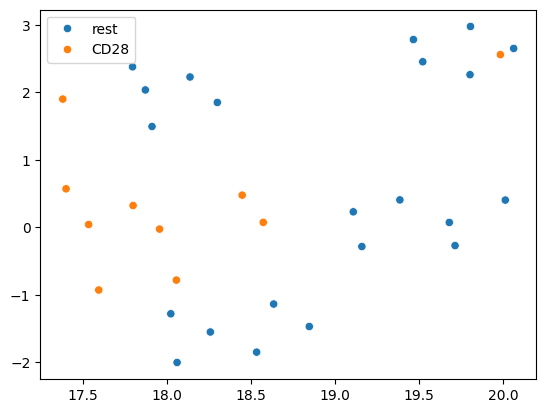

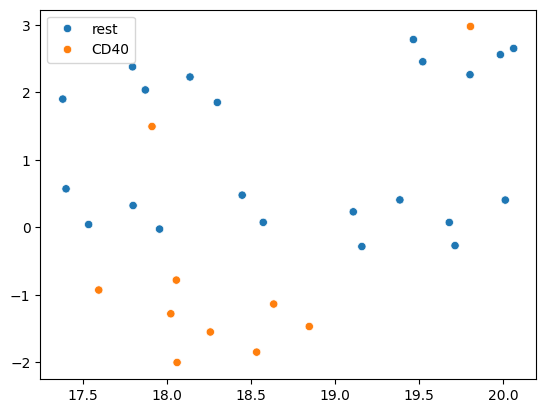

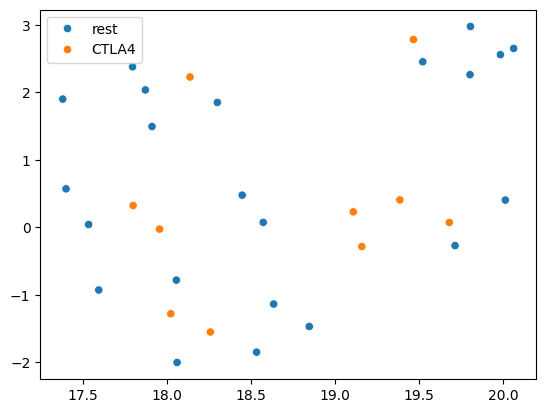

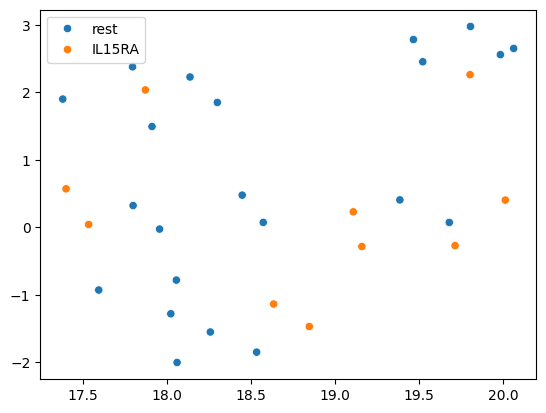

In [39]:
for d in ["41BB", "CD28", "CD40", "CTLA4", "IL15RA"]:
    sns.scatterplot(x=Y1[:, 0], y=Y1[:, 1], hue=[d if d in car else "rest" for car in embedding.index])
    plt.show()


In [42]:
sel_cars = [car for car in embedding.index if not "41BB" in car]
eval_cars = [car for car in embedding.index if "41BB" in car]
sel_cars

['CD28-CD28-z',
 'CD28-CD40-z',
 'CD28-CTLA4-z',
 'CD28-IL15RA-z',
 'CD28-NA-z',
 'CD40-CD28-z',
 'CD40-CD40-z',
 'CD40-CTLA4-z',
 'CD40-IL15RA-z',
 'CD40-NA-z',
 'CTLA4-CD28-z',
 'CTLA4-CD40-z',
 'CTLA4-CTLA4-z',
 'CTLA4-IL15RA-z',
 'CTLA4-NA-z',
 'IL15RA-CD28-z',
 'IL15RA-CD40-z',
 'IL15RA-CTLA4-z',
 'IL15RA-IL15RA-z',
 'IL15RA-NA-z',
 'NA-NA-NA',
 'NA-NA-z']

In [44]:
for c in eval_cars:
    print(c)

41BB-41BB-z
41BB-CD28-z
41BB-CD40-z
41BB-CTLA4-z
41BB-IL15RA-z
41BB-NA-z
CD28-41BB-z
CD40-41BB-z
CTLA4-41BB-z
IL15RA-41BB-z


- Do we train on all cars, even the ones with fewer cells? This would give us more data, but we might not be able to accurately estimate the underlying distribution for these low cell number cars...